# Machine Learning Project

### Date-a-scientist

This project analyses data from online dating app OKCupid. Since the rise in smartphones and social media, dating apps have risen too, with a massive increase in usage, on apps such as Tinder and Hinge, where singles hope to find love.

These apps unbeknownst to most use data science techniques to recommend possible matches to users and optimize the experience. These various and increasingly numerous apps give us access to a plethora of information that we've never before had regarding how different people experience romance.

'profiles.csv' provided by Codecademy.com



### Dataset

The project uses one data set called 'profiles.csv'. In the data, each row represents an OkCupid user and the columns are responses their user profiles including multiple choice and short answer questions.

### Project Goals 

The primary goals of the project are to answer whether ethnicity contributes to higher or lower income, as well as analysing educational level with salary, as there are many question marks in today's society whether education means a higher salary in the future. The ulitmate goal is to create a machine learning model that can use the data to illustrate feature importance, in this case, which selected variables have the biggest impact on income.

### Importing Libraries

In [77]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import f1_score, r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [78]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.info() # previewing data, searching for wrong data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

### Columns Description

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [79]:
list(profiles.columns)


['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

### Exploring Data

Searching for null values in columns

In [80]:
profiles.isnull().sum() # listing all null values summarised

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

This in itself is interesting data, though it's a simple analysis it's clear that people on dating apps are uninterested in filling in the essay sections, suggesting that users don't put too much effort into creating the profiles and don't take it seriously.

Exploring the number of unique income values.

In [81]:
print("number of categories:",profiles.income.nunique())
print("categories:", profiles.income.unique())

number of categories: 13
categories: [     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]


Looking at how many  separate ethnicities are included in the dataset.

In [82]:
print("number of ethnicities",profiles.ethnicity.nunique())
print('ethnicity',profiles.ethnicity.unique())

number of ethnicities 217
ethnicity ['asian, white' 'white' nan 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'p

Searching the dataset's education column

In [83]:
print(profiles['education']) # exploring how the education column is worded, looking for common words for language processing

0            working on college/university
1                    working on space camp
2           graduated from masters program
3            working on college/university
4        graduated from college/university
                       ...                
59941    graduated from college/university
59942        working on college/university
59943       graduated from masters program
59944        working on college/university
59945       graduated from masters program
Name: education, Length: 59946, dtype: object


### Cleaning the data

#### Cleaning Education Data

In [84]:
profiles['educationCleaned'] = profiles.education.str.split().str.get(0)
print("number of categories:",profiles.educationCleaned.nunique())
print("categories:", profiles.educationCleaned.unique())

profiles.educationCleaned.value_counts()

number of categories: 11
categories: ['working' 'graduated' nan 'college/university' 'dropped' 'two-year'
 'space' 'masters' 'high' 'law' 'ph.d' 'med']


educationCleaned
graduated             39376
working               10465
dropped                2108
college/university      801
two-year                222
masters                 136
high                     96
space                    58
ph.d                     26
law                      19
med                      11
Name: count, dtype: int64

Due to the original cleaned education data not producing accurate values, due to crossover, i.e users using the word "working" for many of the other categories like "space" and "masters". I'm going to use rule based natural language processing to make the values more accurate.

In [85]:
def categorize_education(text):
    text = str(text).lower().strip() # standardise text
    if 'working on' in text and ('university' in text or 'college' in text or 'studying' in text or 'student_at'):
        return 'University Student'
    elif 'ph.d'in text or 'phd' in text:
        return 'PHD'
    elif 'masters' in text:
        return 'Masters'
    elif 'university' in text or 'college' in text or "bachelor's" or "graduated" or "graduate" in text:
        return 'University (Completed)'
    elif 'high school' in text:
        return 'High School'
    else:
        return 'Other'
    
profiles['Education'] = profiles['education'].apply(categorize_education) # creating new column using the function defined above

profiles['Education'].value_counts() # reviewing changes


Education
University (Completed)    38819
University Student        10465
Masters                    9237
PHD                        1425
Name: count, dtype: int64

Ranking Education Variables. By giving the model ordinal data, it can find the split points between degrees more efficiently than with random labels

In [158]:
education_map = {
    'University Student': 1,
    'University (Completed)': 2,
    'Masters': 3,
    'PHD': 4
}

profiles['Education'] = profiles['Education'].map(education_map)

#### Cleaning Ethnicity Data

In [86]:
replacements = {
    "white": "White",
    "asian": "Asian",
    "hispanic / latin": "Hispanic",
    "black": "Black",
    "indian": "Indian",
    "pacific islander": "Pacific Islander",
    "middle eastern": "Middle Eastern",
    "native american": "Native American",
}

def clean_ethnicity(value):
    if pd.isna(value):
        return None
    # Split by commas and normalize
    parts = [p.strip().lower() for p in value.split(",")]
    categories = {replacements[p] for p in parts if p in replacements}
    if not categories:
        return "Other" # anything not in mapping
    if len(categories) > 1:
        return "Mixed" # if multiple mapped groups
    return categories.pop() # cleaning ethnicity values

profiles['Ethnicity'] = profiles['ethnicity'].apply(clean_ethnicity)

profiles['Ethnicity'].value_counts(dropna=False).head(20)


Ethnicity
White               33472
Asian                6229
Mixed                5769
None                 5680
Hispanic             2961
Black                2141
Other                1706
Indian               1107
Pacific Islander      446
Middle Eastern        352
Native American        83
Name: count, dtype: int64

#### Cleaning Income Data

In [87]:
profiles['income_clean'] = np.where(profiles['income'] >= 20000, profiles['income'], np.nan) # After previewing the column, many of the participants either didn't answer or inputted 0. This removes any response below 20000
profiles.dropna(subset=['income_clean'], inplace=True)
profiles['Income'] = profiles['income_clean']
profiles['Income'].value_counts()


Income
20000.0      2952
100000.0     1621
80000.0      1111
30000.0      1048
40000.0      1005
50000.0       975
60000.0       736
70000.0       707
150000.0      631
1000000.0     521
250000.0      149
500000.0       48
Name: count, dtype: int64

### Reviewing Variables

#### Age

In [88]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 1);

As shown above, the vast majority of users fit inbetween the 25-35 age range with the peak at 28, where the data is left skewed and the age increases, demonstrating the slow decline of dating app users as they get older with a minor resurge of participants in their early 40s. 

#### Income

In [89]:
sns.displot(data=profiles, x="Income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

Clearly most participants don't wish to include their income. 

#### Education


In [90]:
sns.countplot(data=profiles, y="Education");

Most participants who included their education data are graduate level. 

### Visualising Data 

#### Comparing ethnicity and income


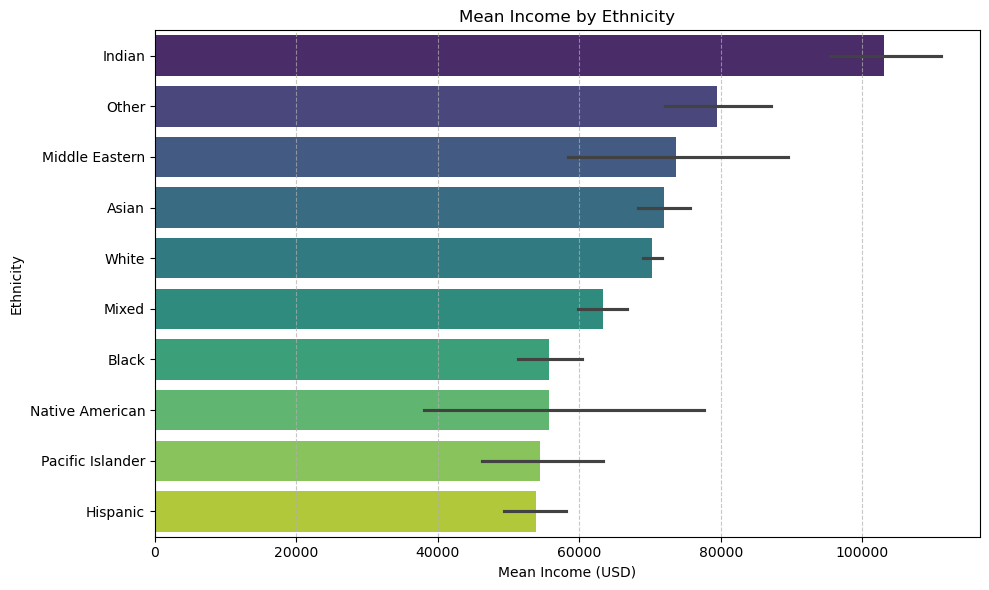

In [159]:
eth_inc_grouped = profiles.dropna(subset=['Income', 'Ethnicity'])

# Calculate mean income per ethnicity (descending order)
ethnicity_order = eth_inc_grouped.groupby('Ethnicity')['Income'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(data=eth_inc_grouped,
           y='Ethnicity',
           x='Income',
           order=ethnicity_order,
           estimator='mean',
           palette='viridis')

plt.title('Mean Income by Ethnicity')
plt.xlabel('Mean Income (USD)')
plt.ylabel('Ethnicity')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Comparing age and mean income


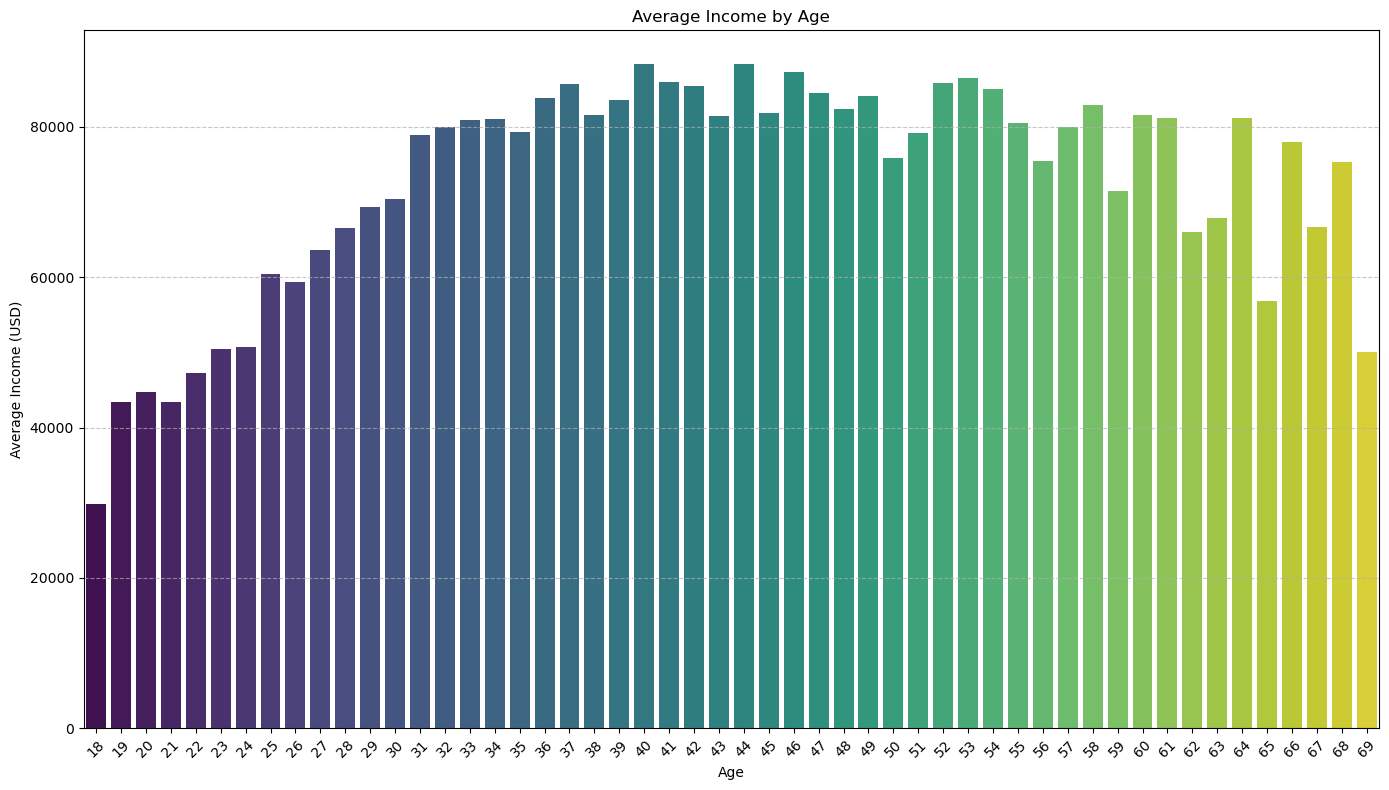

In [160]:
clean_data = profiles.dropna(subset=['Income', 'age'])

# Create the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=clean_data, 
            x='age', 
            y='Income',
            estimator=np.mean,
            ci=None,
            palette='viridis')

# Add labels and title
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many age values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

The bar chart exhbits some insightful data, with income peaking in participants' early 30s and seemingly the average income per decade slowly declining, with a sudden resurge at 68 which could indicate an outlier.

#### Comparing eduation and mean income

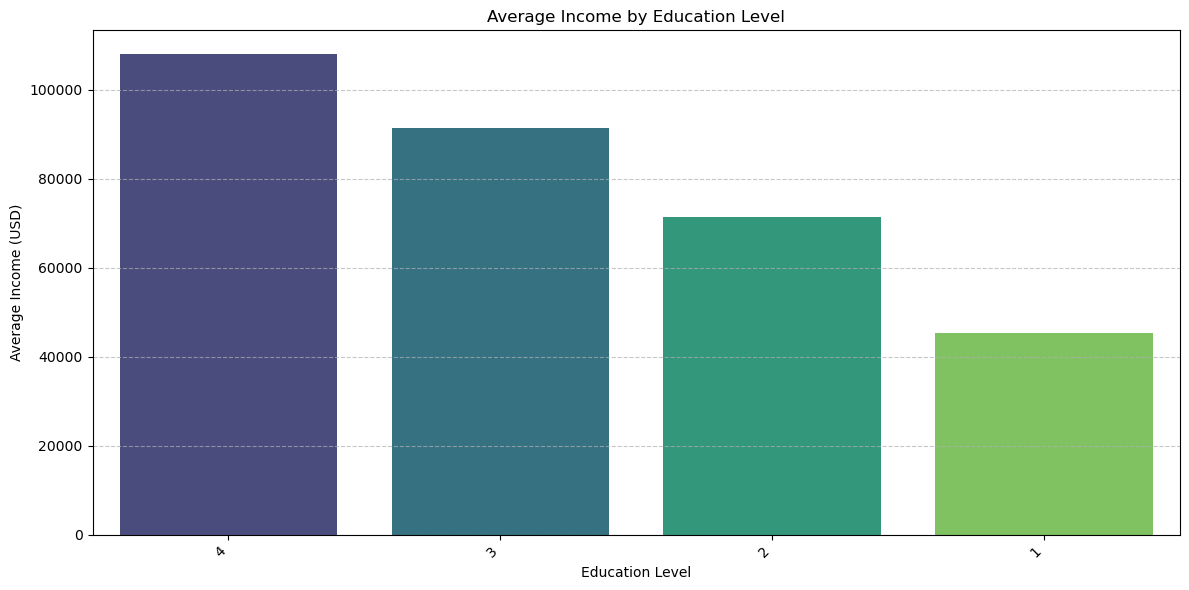

In [161]:
edu_inc = profiles.dropna(subset=['Income', 'Education'])

# Calculate mean income per education level (descending order)
edu_order = edu_inc.groupby('Education')['Income'].mean().sort_values(ascending=False).index

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=clean_data, 
            x='Education', 
            y='Income',
            order=edu_order,  # Sort by income (highest to lowest)
            estimator=np.mean,
            ci=None,
            palette='viridis')

# Add labels and title
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

The plot demonstrates a clear growth in salary when a higher education level is achieved, however shows only a slight inreas between masters graduates and graduates below, which could indicate that gaining a masters only increases your salary when you use it to get a PHD, but could also mean employers value the time regular university students spend straight after university when they use their skills straight into the work force rather than pursuing a masters

In [162]:
print(profiles['Income'].describe())
sns.boxplot(x=profiles['Income'])

count     11504.000000
mean      69385.431154
std       58445.000191
min       20000.000000
25%       20000.000000
50%       50000.000000
75%      100000.000000
max      250000.000000
Name: Income, dtype: float64


<Axes: xlabel='Income'>

Mean is 104,394 but my median is 50,000. Massive right skew and standard deviation is 2x larger than my average income. Noisy signal

In [163]:
# Capping Outliers
profiles['Income'] = profiles['Income'].clip(upper=250000)

# Normalising distribution
profiles['Salary'] = np.log1p(profiles['Income'])

### Data Preparation

#### Missing data

Missing data isn't handled well by Machine Learning algorithms and have to be checked so they need to be imputed or removed. 

In [164]:
profiles.isnull().sum()

age                    0
body_type            566
diet                4039
drinks               227
drugs               1812
education            721
essay0               903
essay1              1221
essay2              1522
essay3              1817
essay4              1900
essay5              1945
essay6              2301
essay7              2032
essay8              3084
essay9              2013
ethnicity            720
height                 0
income                 0
job                  341
last_online            0
location               0
offspring           5892
orientation            0
pets                2787
religion            2485
sex                    0
sign                1368
smokes               531
speaks                 5
status                 0
educationCleaned     721
Education              0
Ethnicity            720
income_clean           0
Income                 0
Salary                 0
dtype: int64

#### Preprocessing

Preparing data for modelling is important since it speeds up the process and produces better models. Poor data produces poor outputs, or in this case poor machine learning models. 

In [165]:
profiles_final = profiles[['Salary', 'age', 'Ethnicity', 'Education']]
profiles_final = profiles_final.dropna()
print(profiles_final)


          Salary  age Ethnicity  Education
1      11.289794   35     White          1
3       9.903538   23     White          1
11     10.596660   28     White          2
13     10.308986   30     White          2
14     10.819798   29     Mixed          1
...          ...  ...       ...        ...
59917  11.512935   26     White          3
59927  10.819798   26     White          2
59930  11.156265   41  Hispanic          2
59934  11.289794   43     White          3
59943  11.512935   42     Asian          3

[10784 rows x 4 columns]


### Prediction 

#### Building the model. 

Now to create the machine learning algorithm. My aim is to create a model that predicts income based  on the mean income for each age. 

For this prediction, I will be using a Multiple Linear Regression model to predict income using Ethnicity, Age and Education. 

I'm also encoding the data after the split to reduce risk of data leakage.

#### Encoding Categorical Data and building the model

In [166]:
X = profiles_final[['age', 'Education', 'Ethnicity']]
y = profiles_final['Salary']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
le = LabelEncoder()
# Use a loop to fit on train and transform test for your cat_cols
for col in ['Ethnicity', 'Education']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# 4. SCALE X_TRAIN ONLY
scaler = StandardScaler()
X_train[['age']] = scaler.fit_transform(X_train[['age']])
X_test[['age']] = scaler.transform(X_test[['age']])

# 5. TRAIN MODEL (Don't scale 'y'—XGBoost doesn't need it!)
income_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)


#### Training the model

In [167]:
# Training XGBoost regressor
income_model = xgb.XGBRegressor(objective='reg:squarederror',
                                n_estimators=100, learning_rate=0.1, 
                                max_depth=5)
income_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

#### Making Predictions

In [168]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import r2_score

from xgboost import XGBClassifier
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

#### Predictions and evaluation

In [169]:
y_pred = income_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.4496820914551082
R2 Score: 0.2126023528588441


#### Residual Plot

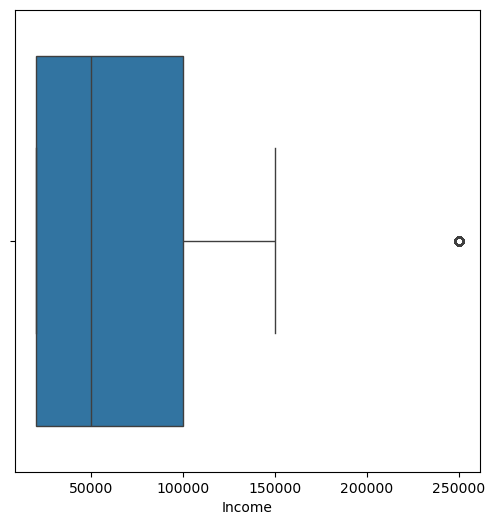

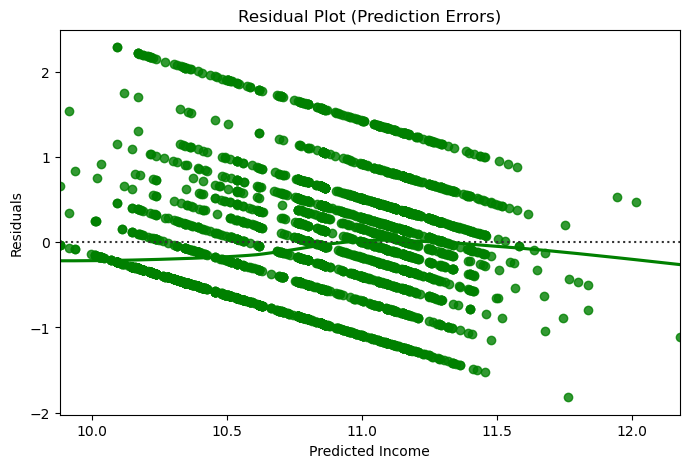

In [170]:
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=y_test, lowess=True, color="g")
plt.title('Residual Plot (Prediction Errors)')
plt.xlabel('Predicted Income')
plt.ylabel('Residuals')
plt.show()

#### Visualising Which of the variables have the biggest impact on income

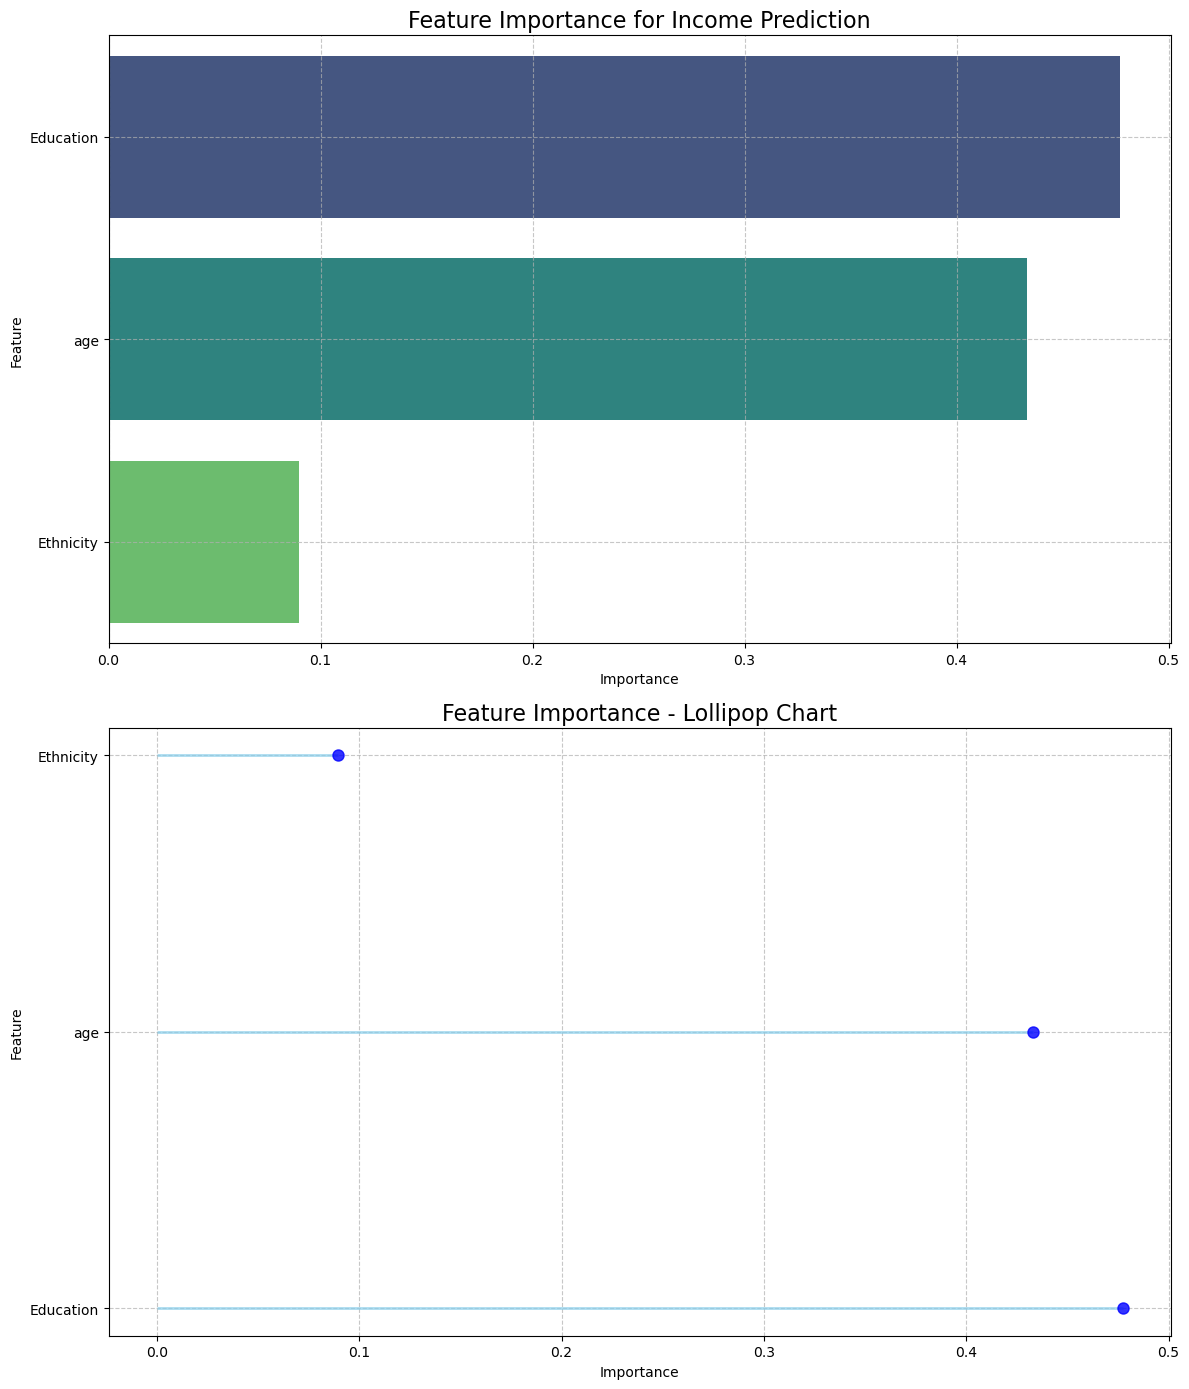

In [171]:
if hasattr(income_model, 'feature_importances_'):
    importances = income_model.feature_importances_
    feature_names = X.columns
elif hasattr(income_model, 'coef_'):
    importances = np.abs(income_model.coef_)
    feature_names = X.columns
else:
    from sklearn.inspection import permutation_importance
    result = permutation_importance(income_model, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Create a figure with multiple visualizations
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# 1. Horizontal bar chart - clearer for comparing many features
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=axes[0], palette='viridis')
axes[0].set_title('Feature Importance for Income Prediction', fontsize=16)
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')

# 2. Lollipop chart - elegant alternative with clear ranking
axes[1].hlines(y=importance_df['Feature'], xmin=0, xmax=importance_df['Importance'], color='skyblue', alpha=0.7, linewidth=2)
axes[1].plot(importance_df['Importance'], importance_df['Feature'], "o", markersize=8, color='blue', alpha=0.8)
axes[1].set_title('Feature Importance - Lollipop Chart', fontsize=16)
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')

# Add grid lines for better readability
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[0].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Education is clearly shown to have the biggest impact on income when predicting someone's salary based on the 3 chosen variables.

To quantify the relationships and Income I will calculate the correlation coefficients below

In [172]:
# Education

# Using the encoded split sets and temporarily converting into one frame for correlation
train_data = X_train.copy()
train_data['Salary'] = y_train

edu_correlation = train_data['Education'].corr(train_data['Salary'])
print(f"Correlation between Education and Income: {edu_correlation:.3f}")

Correlation between Education and Income: 0.380


# Conclusion

#### The Challenge
The initial data was highly "noisy," featuring extreme outliers (up to 1M) and a significant right-skew, which caused the baseline model to fail completely (indicated by a massive negative R2).

#### Data Engineering
Outlier Stabilization: Capped the income at 250,000 to prevent extreme values from distorting the model's logic.

Target Normalization: Applied a Log1p Transformation to the income variable, converting the skewed distribution into a near-normal bell curve for more stable training.

Ordinal Mapping: Replaced alphabetical encoding with a manual "Education Ladder," which corrected a misleading negative correlation to a logical positive correlation of 0.380.

#### Key Results
Model Performance - The XGBoost Regressor achieved an R2 score of 0.213, meaning the model explains roughly 21% of the variance in user income.
Prediction Error - The Mean Squared Error (MSE) was reduced to 0.449 on the log scale, demonstrating consistent predictive accuracy across demographics.

#### Findings
Education is the Primary Driver: With a feature importance score of ~0.49 and a positive correlation of 0.380, education level is the strongest predictor of income in this dataset. This confirms that higher educational attainment remains a significant factor in earning potential.

Age as a Steady Predictor: Age followed closely (Importance: ~0.42), showing a positive correlation of 0.308. This aligns with the "career ladder" expectation that income scales with professional experience.

Ethnicity and Income: While ethnicity was a factor in the model, its relative importance (~0.09) was significantly lower than Education and Age. This suggests that within this dating pool, professional and life-stage factors have a much larger impact on salary than ethnic background.

#### Model Health
The model achieved an $R^2$ score of 0.213. While this indicates that 79% of income variation is determined by factors outside our data (like job titles or industry), a 21% explanation rate is a significant success for social science survey data.

#### Demonstrated Abilities
Throughout this project, I've demonstrated the following skills:
- Data Cleaning
- Effective Data Visualisation
- EDA
- Data Preprocessing
- Creating a Machine Learning Model